In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt


In [3]:
# Loading the dataset
df = pd.read_csv('../data/datacar_cleaned.csv')
print(df.head())

   year  selling_price  km_driven  fuel  seller_type  transmission  owner  \
0  2014         450000     145500     1            1             1      0   
1  2014         370000     120000     1            1             1      2   
2  2006         158000     140000     3            1             1      4   
3  2010         225000     127000     1            1             1      0   
4  2007         130000     120000     3            1             1      0   

   mileage  engine  max_power  seats  
0    23.40  1248.0      74.00    5.0  
1    21.14  1498.0     103.52    5.0  
2    17.70  1497.0      78.00    5.0  
3    23.00  1396.0      90.00    5.0  
4    16.10  1298.0      88.20    5.0  


In [4]:
#spliting the dataset into features and target variables
X= df.drop(columns=['selling_price'])
y= df['selling_price']

In [5]:
# train -test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
ridge = Ridge(alpha=1.0)
# Fit the model to the training data
ridge.fit(X_train, y_train)

Ridge()

In [7]:
#Making predictions 
y_pred = ridge.predict(X_test)

In [9]:
#Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
root_mse  = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"mean_absolute_error; {mae}")
print(f"R2 Score: {r2_score}")
print(f"Root Mean Squared Error: {root_mse}")

Mean Squared Error: 205487700121.10648
mean_absolute_error; 272391.1695701623
R2 Score: <function r2_score at 0x000001D599D31F80>
Root Mean Squared Error: 453307.5116530791


In [10]:
evalation = []
model = " Ridge Regression"
evalation.append({
    'model': model, 
    'MAE': mae,
    'MSE' : mse,
    'r2score' : r2,
    'Root MSE' : root_mse
})
# Creating a DataFrame to display the evaluation metrics
ev_df = pd.DataFrame(evalation)
print(ev_df)
ev_df.to_csv('../data/evaluation.csv', mode='a', header=False, index=False)

               model           MAE           MSE  r2score       Root MSE
0   Ridge Regression  272391.16957  2.054877e+11  0.68651  453307.511653


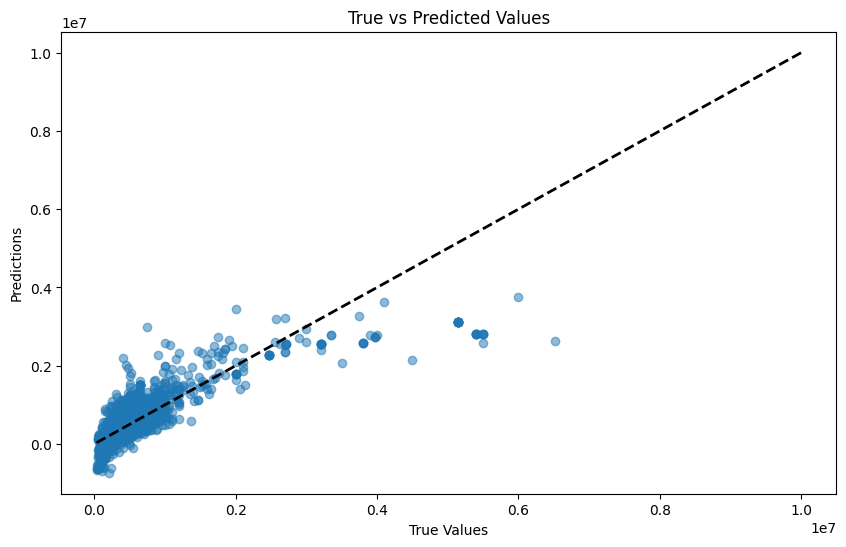

In [14]:
#plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()